# ch.3 - 평가(Evaluation)

In [1]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
        return pred

In [17]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    df['Fare'].fillna(0, inplace = True)
    return df

In [4]:
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
    return df

In [19]:
def format_features(df):
    from sklearn.preprocessing import LabelEncoder
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

In [20]:
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [21]:
import pandas as pd

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titanic_df = pd.read_csv('data/titanic/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size = 0.2, random_state = 0)

In [23]:
from sklearn.datasets import load_digits
import numpy as np

In [25]:
class MyDummyClassifier(BaseEstimator):
    def fit(self, X, y = None):
        pass

    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)

digits = load_digits()

# digits 번호가 7번이면 True, 이를 astype(int)로 1로 변환 아니면 0
y = (digits.target ==7).astype(int)
X_tran, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [26]:
print(y_test.shape)
print()
print(pd.Series(y_test).value_counts())

(450,)

0    405
1     45
dtype: int64


In [28]:
fakeclf = MyDummyClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)

accuracy_score(y_test, fakepred)

0.9

In [30]:
from sklearn.metrics import confusion_matrix
# confusion 매트릭스 출력
confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

In [34]:
# 다른 방법
import sklearn.metrics as skm
skm.confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [36]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [37]:
from sklearn.linear_model import LogisticRegression

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size = 0.2, random_state = 11)
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Precision/Recall Trade-off

In [43]:
# 0일 확률 /// 1일 확률
pred_proba = lr_clf.predict_proba(X_test)
pred_proba

array([[0.4616653 , 0.5383347 ],
       [0.87862763, 0.12137237],
       [0.87727002, 0.12272998],
       [0.88283621, 0.11716379],
       [0.85508952, 0.14491048],
       [0.88231157, 0.11768843],
       [0.88838988, 0.11161012],
       [0.20916926, 0.79083074],
       [0.78258628, 0.21741372],
       [0.36993909, 0.63006091],
       [0.89988359, 0.10011641],
       [0.87482056, 0.12517944],
       [0.87726414, 0.12273586],
       [0.88834471, 0.11165529],
       [0.43495818, 0.56504182],
       [0.85888537, 0.14111463],
       [0.9037587 , 0.0962413 ],
       [0.73319742, 0.26680258],
       [0.72417011, 0.27582989],
       [0.17255821, 0.82744179],
       [0.75341614, 0.24658386],
       [0.61951539, 0.38048461],
       [0.85451436, 0.14548564],
       [0.81519357, 0.18480643],
       [0.88797994, 0.11202006],
       [0.76533031, 0.23466969],
       [0.85969194, 0.14030806],
       [0.92608161, 0.07391839],
       [0.71933832, 0.28066168],
       [0.69482833, 0.30517167],
       [0.

In [44]:
pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [46]:
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]

# threshold 기준값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold = 1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [49]:
# 기준값을 0.5로 설정하고 예측
custom_threshold = 0.5

pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold = custom_threshold)
custom_predict = binarizer.fit_transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


In [51]:
# 기준값을 0.4로 설정하고 예측 => True로 예측할 확률이 늘어남 => 정밀도는 감소, 재현율은 증가
custom_threshold = 0.4

pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold = custom_threshold)
custom_predict = binarizer.fit_transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361


### F1 Score

In [52]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print(f1)

0.7804878048780488


In [53]:
# 함수에 f1 추가
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))

In [55]:
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.tra
        nsform(pred_proba_c1)
        print('임곗값: ', custom_threshold)
        get_clf_eval(y_test, custom_predict)

In [56]:
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값:  0.4
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361, F1: 0.7786
임곗값:  0.45
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033, F1: 0.7840
임곗값:  0.5
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869, F1: 0.7805
임곗값:  0.55
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541, F1: 0.7931
임곗값:  0.6
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377, F1: 0.8036


- ROC 곡선

In [57]:
from sklearn.metrics import roc_curve

In [77]:
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값:',np.round(thresholds[thr_index], 2))
print('샘플 임곗값별 FPR: ',np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ',np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index 10개: [ 1  6 11 16 21 26 31 36 41 46 51]
샘플용 10개의 임곗값: [0.97 0.65 0.63 0.57 0.45 0.38 0.31 0.13 0.12 0.11 0.1 ]
샘플 임곗값별 FPR:  [0.    0.017 0.034 0.076 0.127 0.186 0.237 0.576 0.619 0.754 0.814]
샘플 임곗값별 TPR:  [0.033 0.639 0.705 0.754 0.803 0.852 0.902 0.902 0.951 0.967 1.   ]


In [75]:
def roc_curve_plot(y_test, pred_proba_c1):
    import matplotlib.pyplot as plt
    %matplotlib inline
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    plt.plot(fprs, tprs, label = 'ROC')
    plt.plot([0, 1], [0, 1], 'k--', label = 'Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR(1-Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()

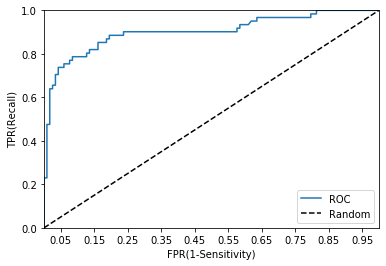

In [76]:
roc_curve_plot(y_test, pred_proba[:, 1])